<a href="https://www.kaggle.com/code/mdaliraza/diabetes-ml?scriptVersionId=102608895" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **Introduction**
This is a diabetes dataset, Diabetes is a chronic disease and a major challenge across the world. Hence, identifying factors associated with disease is very important. Accurate and fast diagnosis/prediction of the disease will help us to avoid any future complications associated with diabetes. 

## **Aim**
The Aim of the study is to analyze the factors and create a model to identify weather a person is diabetic or not using.

### **Description of the features of the Dataset**

| Variable Name | Info about Variable |
| --- | --- |
| Pregnancies | Number of times pregnant |
| Glucose | Plasma glucose concentration 2 hours in an oral glucose tolerance test |
| BloodPressure | Diastolic blood pressure (mm Hg) |
| SkinThickness | Triceps skin fold thickness (mm) |
| Insulin | 2-Hour serum insulin (mu U/ml) |
| BMI | Body mass index (weight in kg/(height in m)^2) |
| DiabetesPedigreeFunction | Diabetes pedigree function |
| Age | Age in years |
| Outcome | 0 mean non-diabetic and 1 means diabetic |

**Importing required libraries**

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [50]:
# df = pd.read_csv(r'../input/diabetes-data/diabetes.csv') # loading the dataset
pdf = pd.read_csv(r'C:\Users\mdali\Desktop\data_science\projects\Diabetes_ML\diabetes.csv') # loading the dataset

**Dimensions of the dataframe**

In [51]:
pdf.shape # checking shape of our data

(768, 9)

In [52]:
print('Number of observations    : ', pdf.shape[0]) # number of rows in dataset
print('Number of variables       : ', pdf.shape[1]) # number of columns in dataset

Number of observations    :  768
Number of variables       :  9


**Information about the schema**

In [53]:
pdf.head() # top 5 observations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
pdf.tail() # bottom 5 observations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [55]:
pdf.columns # variables we have in dataset

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [56]:
pdf.describe(include = 'all') # statistical measures of variables

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- some variable has 0 as minimum Glucose, BloodPressure, SkinThickness, Insulin, BMI which is not possible
- also outcome variable should be in category

In [57]:
pdf['Outcome'] = pdf.Outcome.astype('category') # converting outcome variable to category

In [58]:
pdf.info() # data type and null count of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [59]:
pdf.nunique() # no of unique values in each variable 

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [60]:
pdf.isna().sum()# checking for null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- as we can see there is no NaN values but there are zeros in various features 
- these features cannot contain zero as per medical information
- these must be wrong entries or missing values 
- lets change them to NaN and check again

In [61]:
columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] # variables with zero values
pdf[columns] = pdf[columns].replace({ 0:np.nan}) # replacing zero with nan

In [62]:
pdf.isna().sum()# checking for null values

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

- now we can see how many missing values we have in each columns

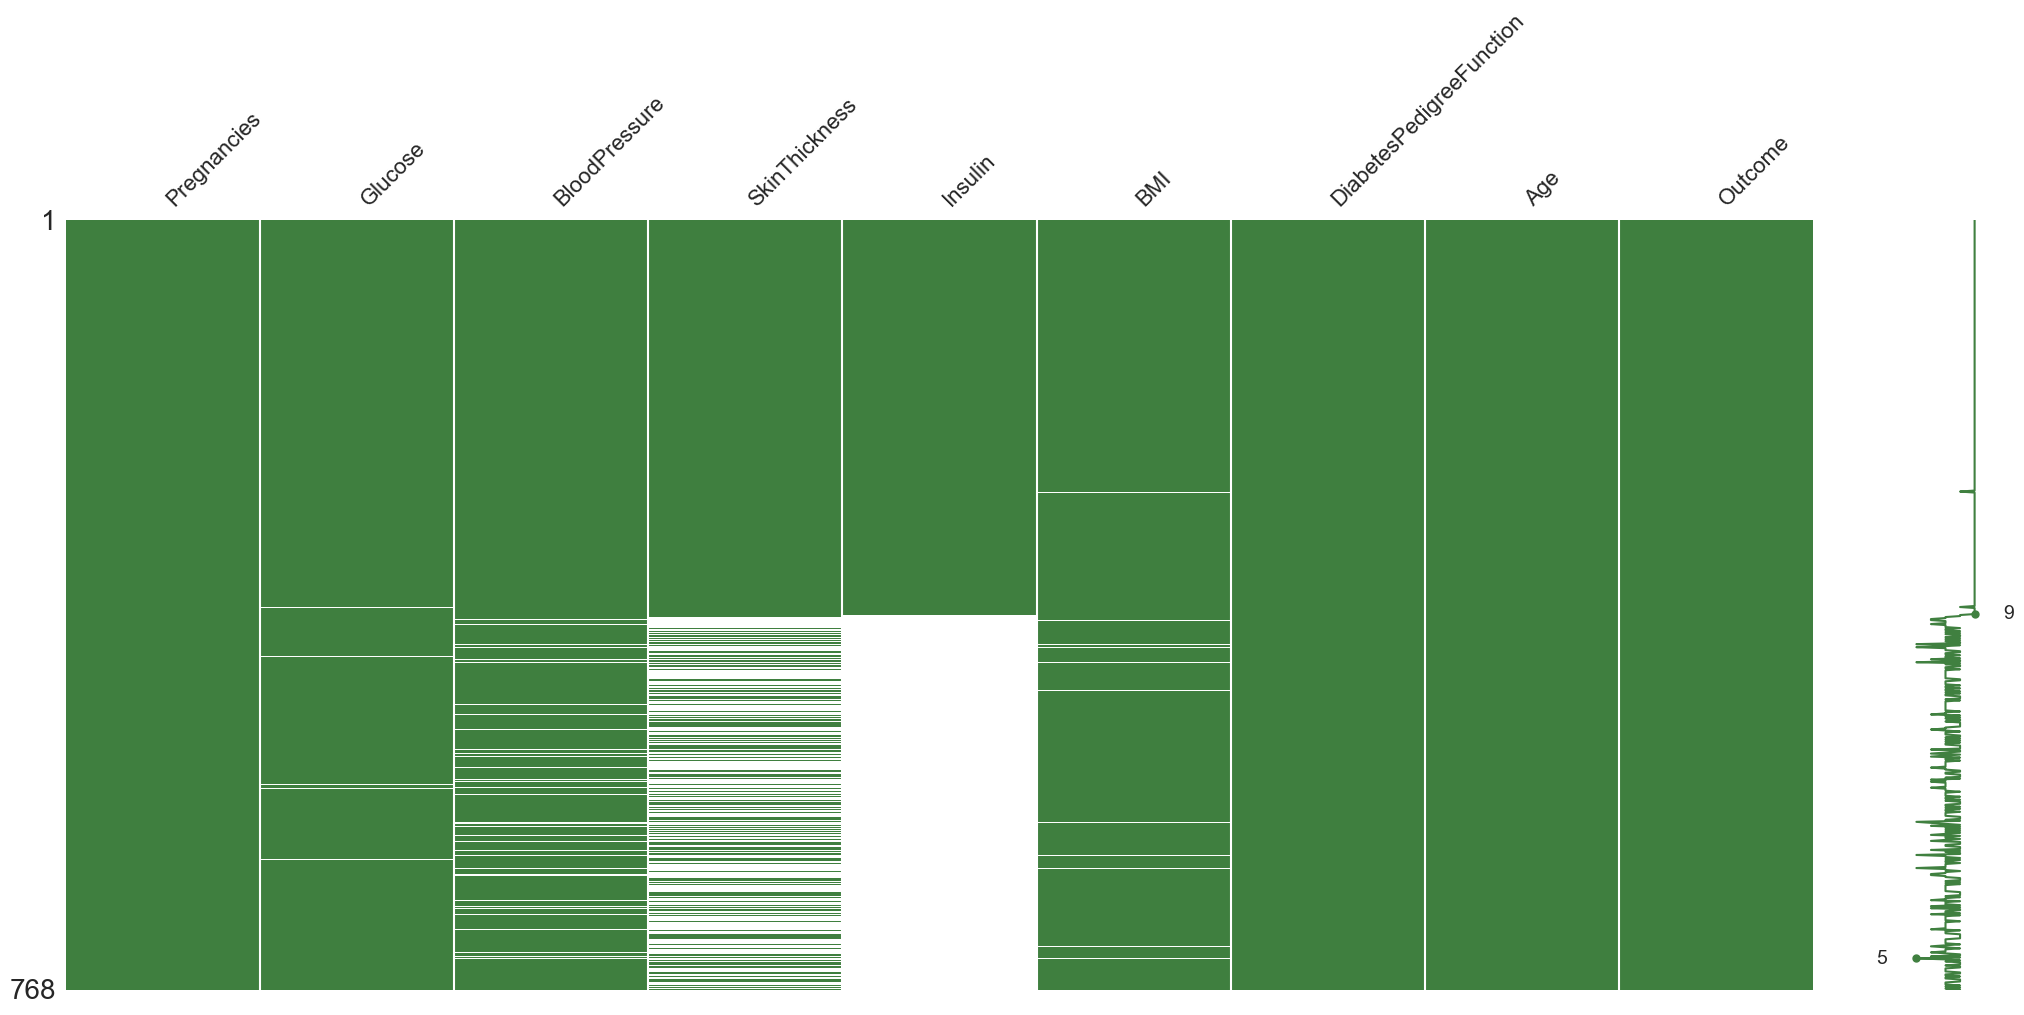

In [63]:
msno.matrix(pdf.sort_values('Insulin', ascending = False),color=(0.25, 0.50, 0.25)) # visualazing missing data
plt.show() # displaying plot

In [64]:
for i in columns:
    percentage = round(pdf[i].isna().sum()/len(pdf[i])*100,2) # calculating percentage of missing data
    print(f'Missing Percentage of Column {i} - ', percentage, '%') # printing their percentage

Missing Percentage of Column Glucose -  0.65 %
Missing Percentage of Column BloodPressure -  4.56 %
Missing Percentage of Column SkinThickness -  29.56 %
Missing Percentage of Column Insulin -  48.7 %
Missing Percentage of Column BMI -  1.43 %


- for columns having less than 5% of missing values we can directly drop them
- also Skin Thickness, Insulin has 30% and 49% missing data which is very huge imputing them by any means will create bias in the model
- so we have to drop SkinThickness and Insulin

In [65]:
pdf.dropna(subset=['Glucose'], how='all', inplace=True) # dropping missing values of glucose
pdf.dropna(subset=['BloodPressure'], how='all', inplace=True) # dropping missing values of BloodPressure
pdf.dropna(subset=['BMI'], how='all', inplace=True) # dropping missing values of BMI
pdf = pdf.drop(columns=['SkinThickness', 'Insulin']) # dropping Skinthickness and Insulin variables

In [66]:
# after dropping rechecking dataset shape
pdf.shape

(724, 7)

In [67]:
pdf.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [68]:
# checking statical measures again after declaring 0 as NaN values
pdf.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,32.467127,0.474765,33.350829
std,3.362803,30.750030,12.379870,6.888941,0.332315,11.765393
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,27.500000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,32.400000,0.379000,29.000000
75%,6.000000,142.000000,80.000000,36.600000,0.627500,41.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000


### **Outcome variable distribution**
- here our outcome variable is 'Outcome' 
- - 0 means non-diabetic
- - 1 means diabetic

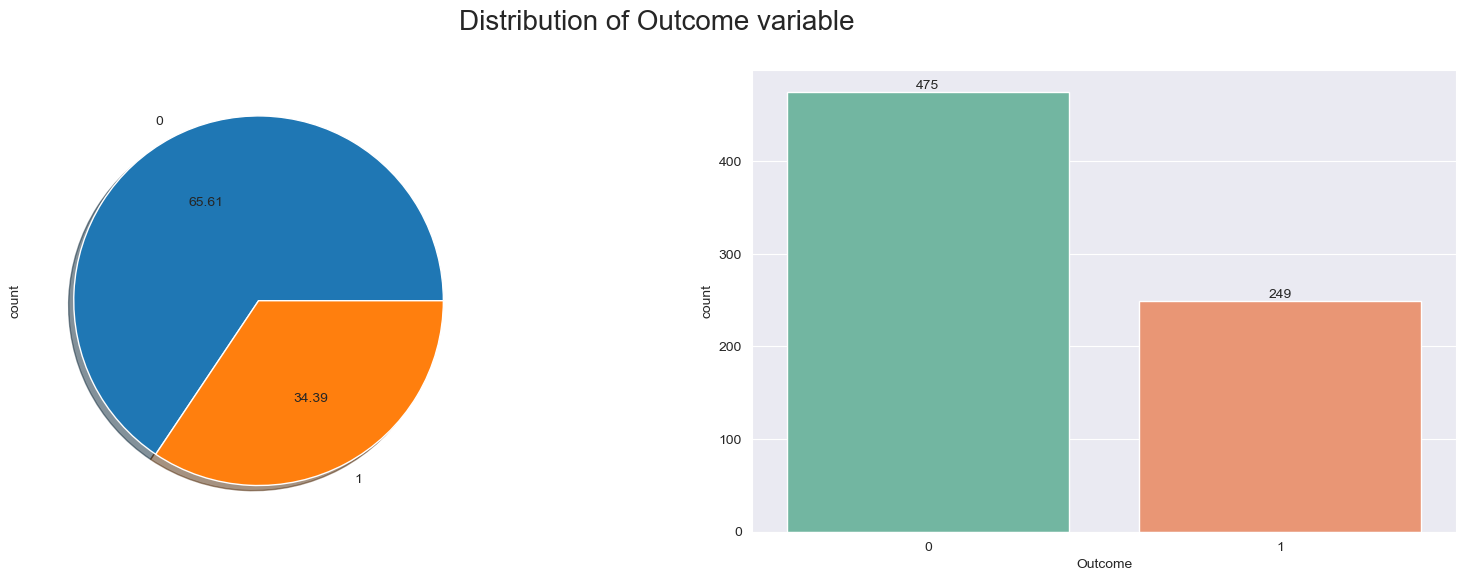

In [69]:
plt.figure(figsize=(20,6)) # plot size
sns.set_style('darkgrid') # setting plot background
plt.suptitle('Distribution of Outcome variable', fontsize = 20) # giving title

plt.subplot(1,2,1) # creating suplots
pdf['Outcome'].value_counts().plot(kind='pie', autopct = '%.2f', shadow = True) # creating pie plot 

plt.subplot(1,2,2) # creating subplots
ax = sns.countplot(x=pdf.Outcome, palette='Set2') # creating countplot
ax.bar_label(ax.containers[0]) # assignig bar values 
plt.show() # displaying plot

- here in our data set majority of our is non-diabetic
- - non-diabetic    66.51%, 475 observations
- - diabetic    34.39%, 249 observations

### **Numerical variable distribution**

In [70]:
num_var = pdf.select_dtypes('number').columns # selecting numerical variables
num_var # viewing numerical variables

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [71]:
def distribution_chart(df, *feature): # creating distribution chart 
    for var in feature: # looping in tupple of features
        plt.figure(figsize=(20,6)) # plot size
        sns.set_style('darkgrid') # setting background
        plt.suptitle(f'Distribution of {var} variable', fontsize = 20) # setting title

        plt.subplot(1,2,1) # setting subplot
        sns.histplot(df, x=var, kde=True) # creating histogram plot
        plt.axvline(x=df[var].mean(), color='red', alpha=0.5, label= 'Mean') # creating mean line
        plt.axvline(x=df[var].median(), color='blue', ls='--', alpha=0.5, label= 'Median') # creating median line
        plt.legend() # displaying legend
        
        plt.subplot(1,2,2) # setting subplot
        sns.boxplot(x=df[var]) # creating boxplot
        plt.show() # displaying the plots

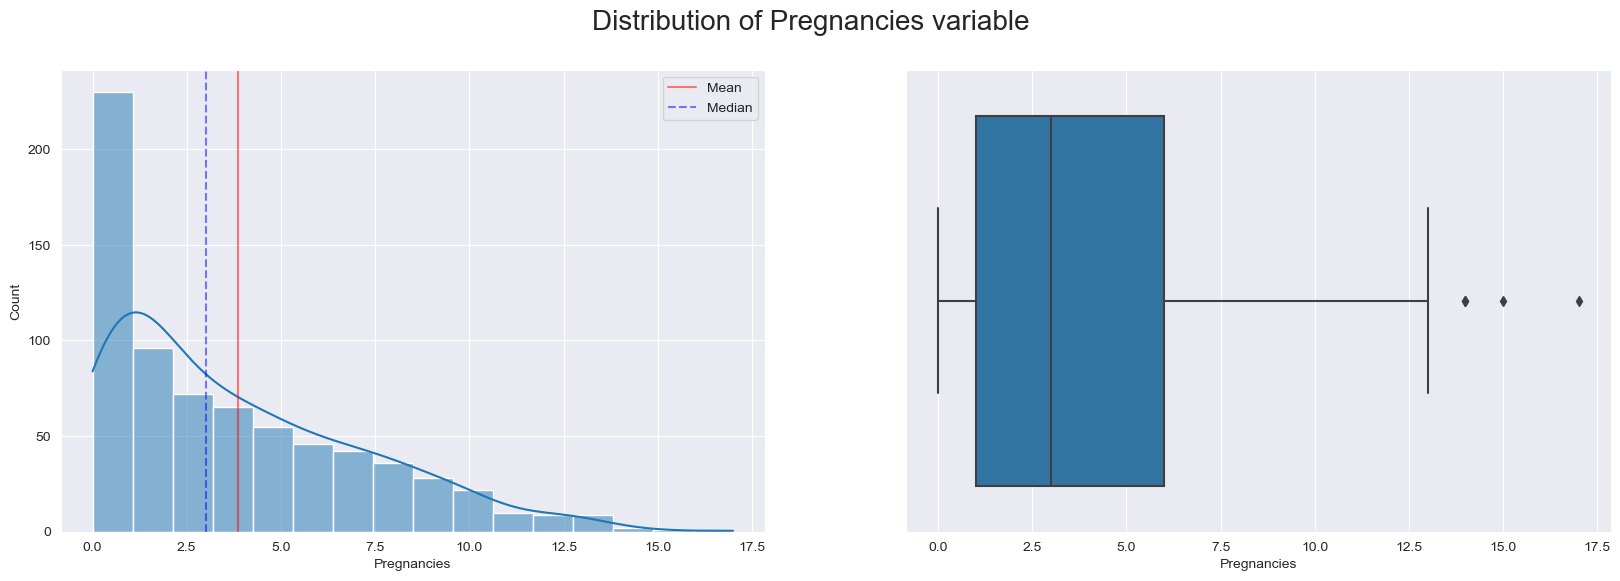

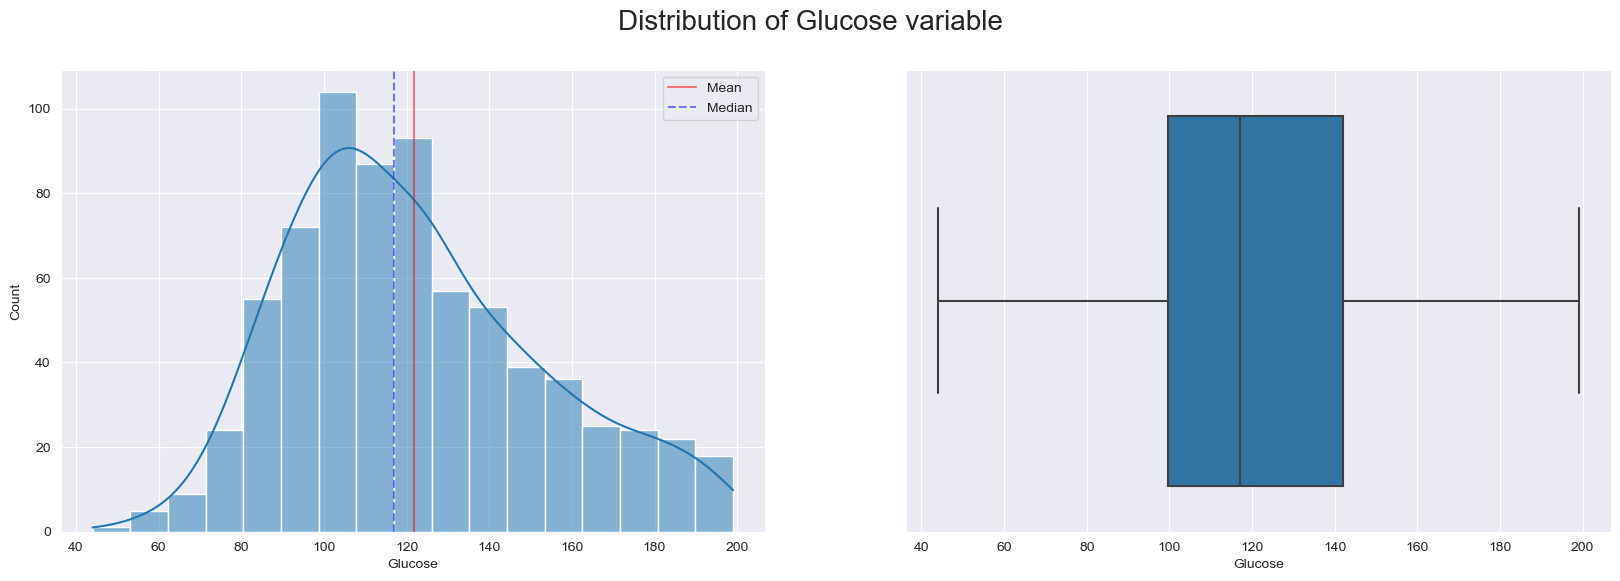

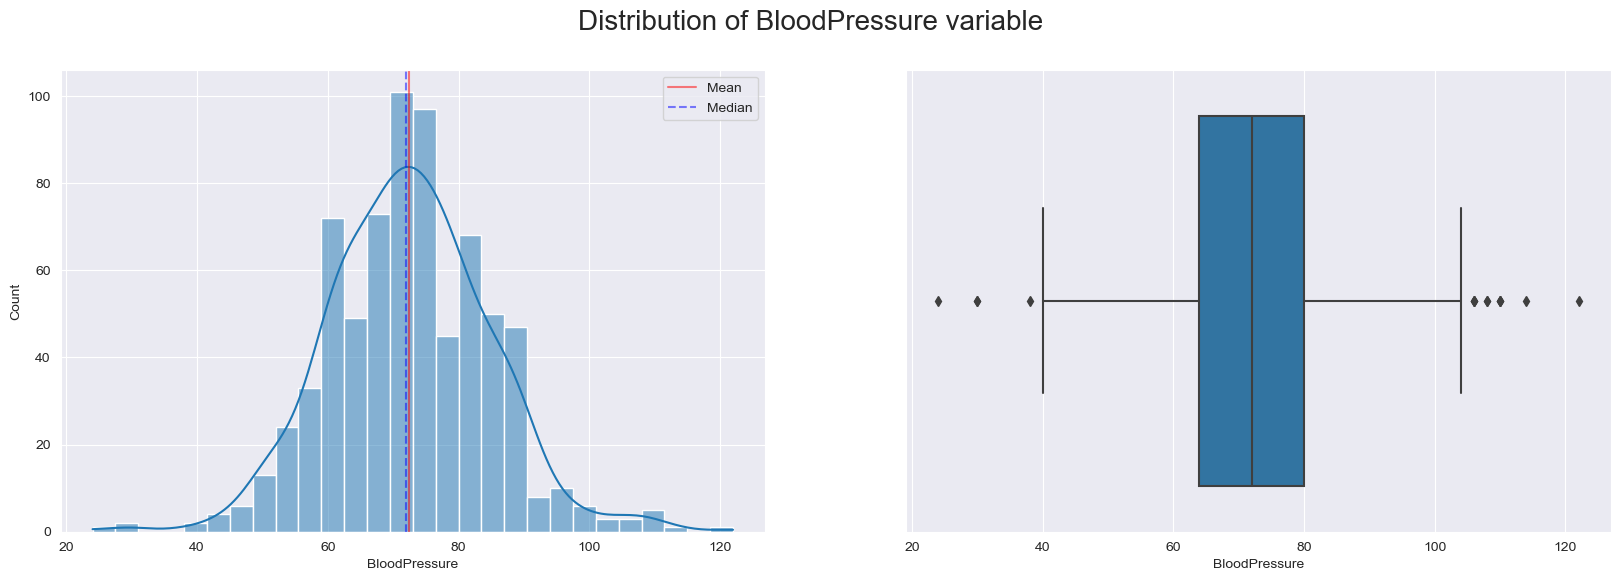

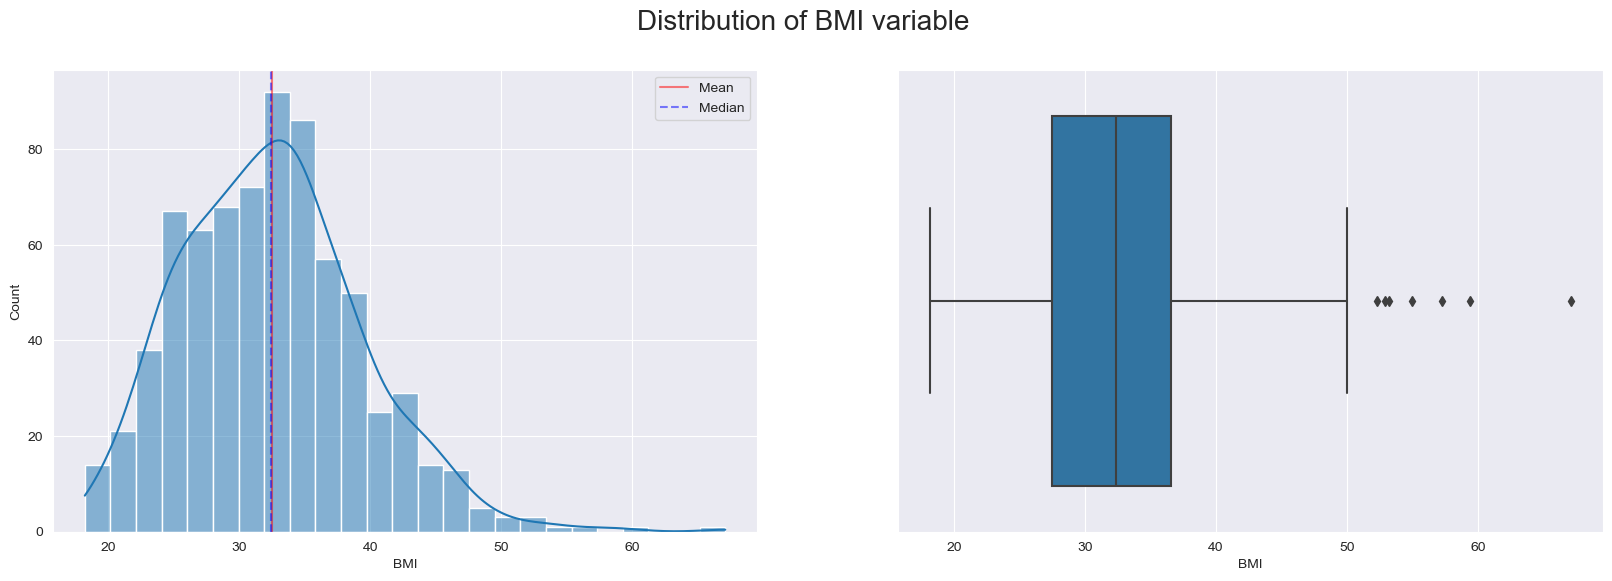

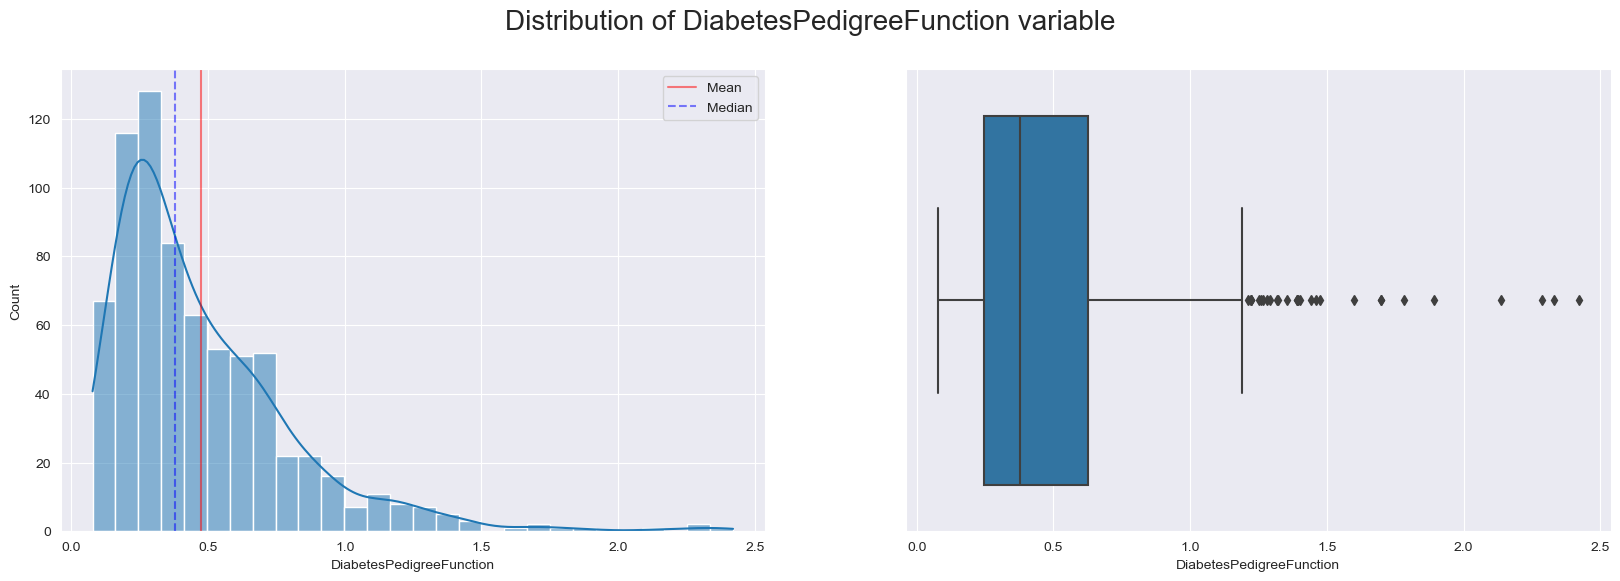

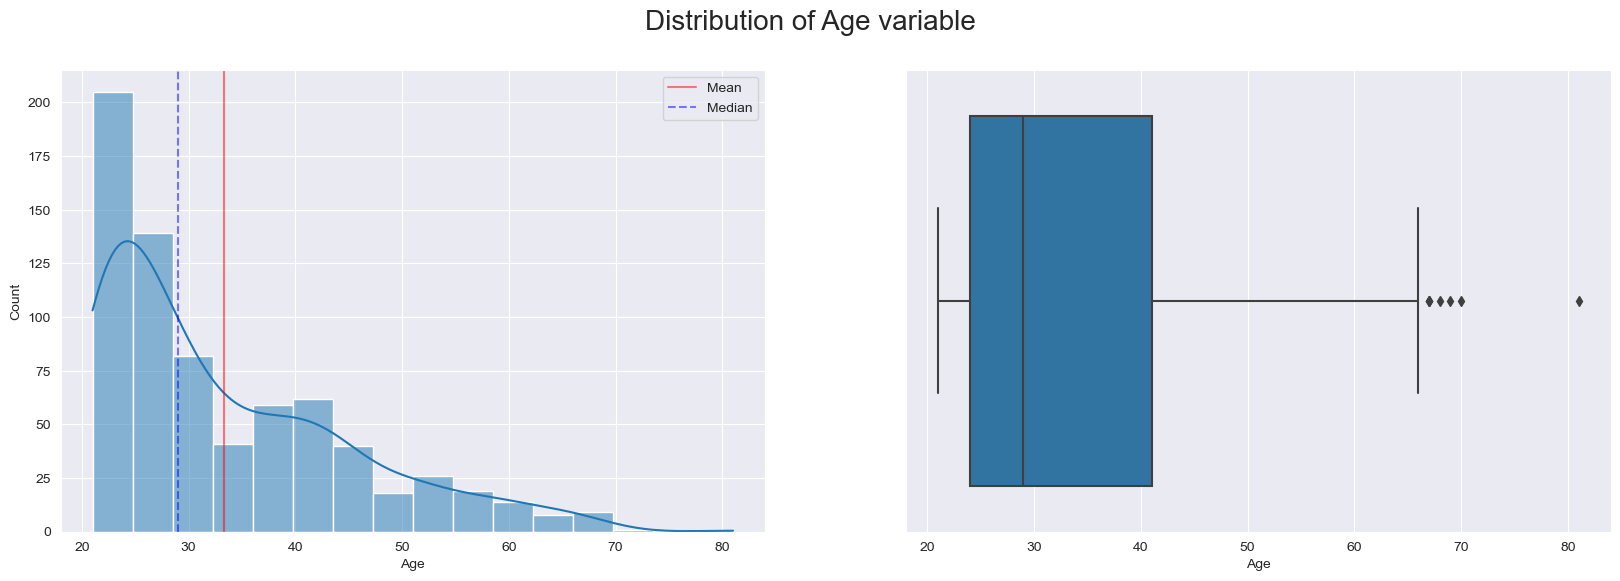

In [72]:
distribution_chart(pdf, 'Pregnancies', 'Glucose', 'BloodPressure','BMI', 'DiabetesPedigreeFunction', 'Age') # calling and displaying plot

- here BMI and Blood Pressure is normaly distributed
- Glucose and Pregnancies are moderately skewed
- DiabetesPedigreeFunction and Age are higly right skewed  

------------ Mean ------------
Pregnancies                   3.866022
Glucose                     121.882597
BloodPressure                72.400552
BMI                          32.467127
DiabetesPedigreeFunction      0.474765
Age                          33.350829
dtype: float64

------------ Median ------------
Pregnancies                   3.000
Glucose                     117.000
BloodPressure                72.000
BMI                          32.400
DiabetesPedigreeFunction      0.379
Age                          29.000
dtype: float64

------------ Skewness ------------



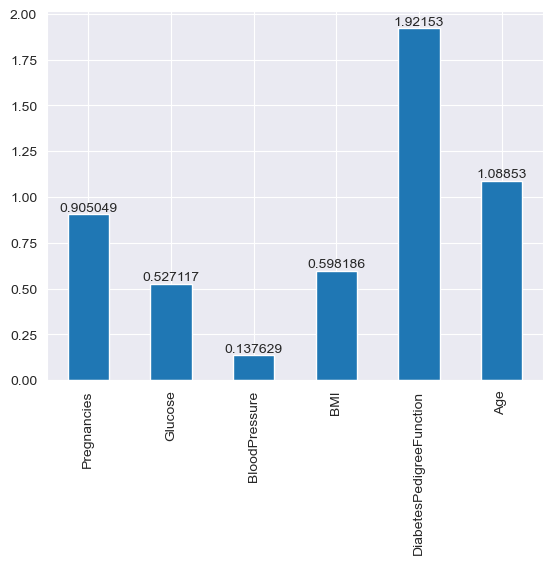

In [73]:
print('------------ Mean ------------')
print(pdf[num_var].mean())
print()
print('------------ Median ------------')
print(pdf[num_var].median())
print()
print('------------ Skewness ------------')
ax = pdf[num_var].skew().plot(kind='bar')
ax.bar_label(ax.containers[0])
print()

- Conclusion

| **skew** | **range**| **variable** |
| - | - | - |
| **highly** | <-1 & >1 | DiabetesPedigreeFunction, Age |
| **moderate** | (-1 to -0.5) & (0.5 to 1)| Glucose, BMI, Pregnancies |
| **symmetrical** | -0.5 to 0.5 | BloodPressure |

### **Outcome with other features**

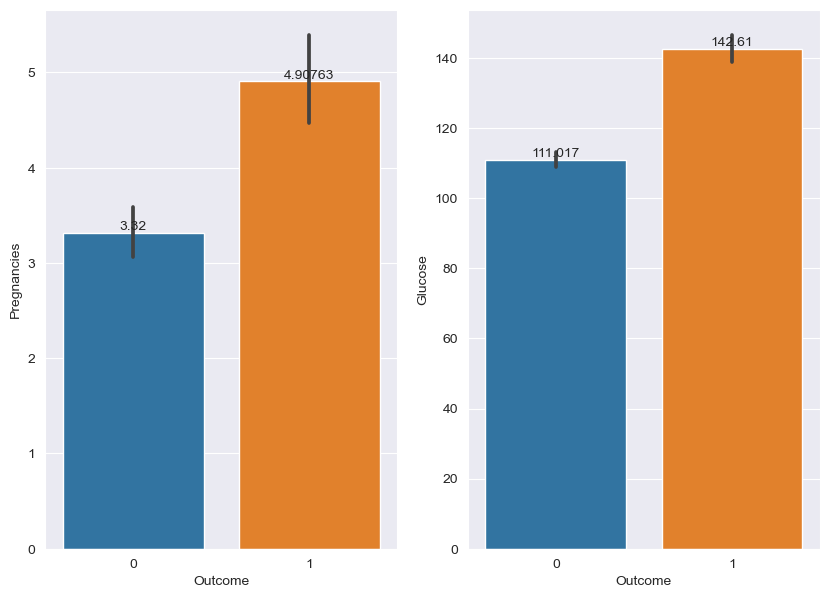

In [74]:
plt.figure(figsize=(10,7)) # plot size

plt.subplot(1,2,1) # setting subplot
ax =sns.barplot(y='Pregnancies', x='Outcome', data=pdf) # creating bar plot
ax.bar_label(ax.containers[0])

plt.subplot(1,2,2) # setting subplot
ax =sns.barplot(y='Glucose', x='Outcome', data=pdf) # creating bar plot
ax.bar_label(ax.containers[0]) # assignig bar values 
plt.show() # displaying the plots

- as this data set contain pregnancies feature which means all observation are of females
- patient with high number of pregnancies are more likely to get diabetic
- as known by medical science person who have high level of glucose have diabetes which is also the case here

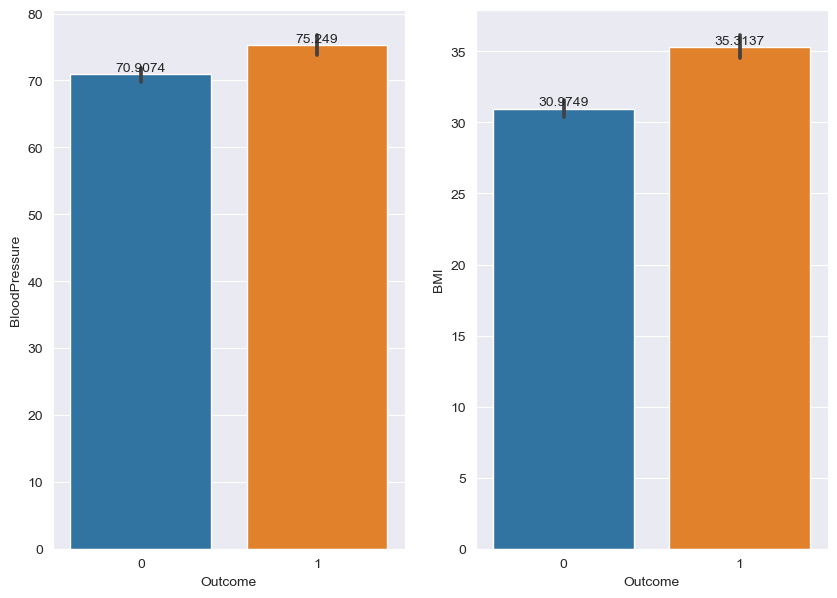

In [75]:
plt.figure(figsize=(10,7)) # plot size

plt.subplot(1,2,1) # setting subplot
ax =sns.barplot(y='BloodPressure', x='Outcome', data=pdf) # creating bar plot
ax.bar_label(ax.containers[0])

plt.subplot(1,2,2) # setting subplot
ax =sns.barplot(y='BMI', x='Outcome', data=pdf) # creating bar plot
ax.bar_label(ax.containers[0]) # assignig bar values 
plt.show() # displaying the plots

- here in both features BMI and BloodPressure doesn't give that much inference 
- but diabetic patient are more likely to have slightly high BloodPressure and BodyMassIndex

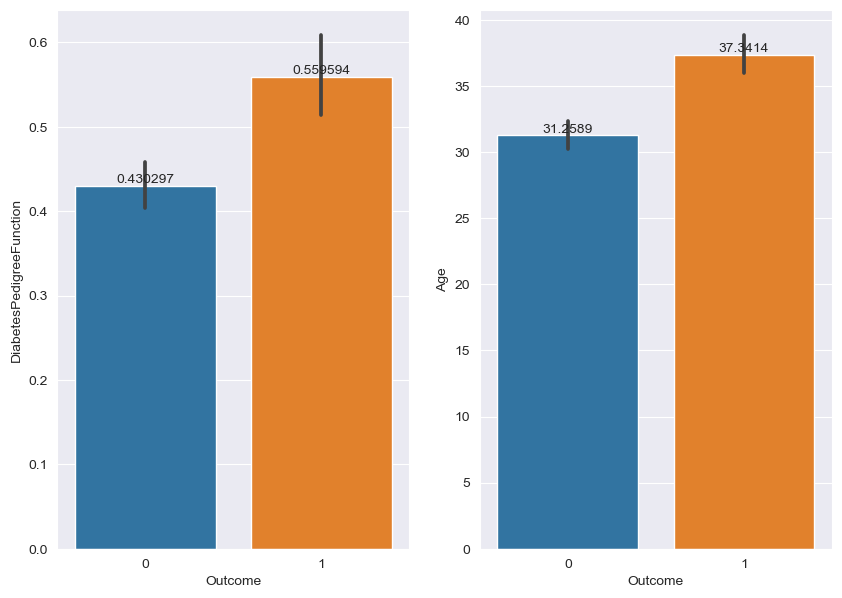

In [76]:
plt.figure(figsize=(10,7)) # plot size

plt.subplot(1,2,1) # setting subplot
ax =sns.barplot(y='DiabetesPedigreeFunction', x='Outcome', data=pdf) # creating bar plot
ax.bar_label(ax.containers[0])

plt.subplot(1,2,2) # setting subplot
ax =sns.barplot(y='Age', x='Outcome', data=pdf) # creating bar plot
ax.bar_label(ax.containers[0]) # assignig bar values 
plt.show() # displaying the plots

- here DiabeticPedigree indicates the function which scores likelihood of diabetes based on family history
- having this value more than 0.5 means got infected by diabetes, as we can see we have mmore number of those patient
- similarly with Age as we know as people gets older, diabetes and prediabetes increases, as deficiency of insulin secretion develops with age

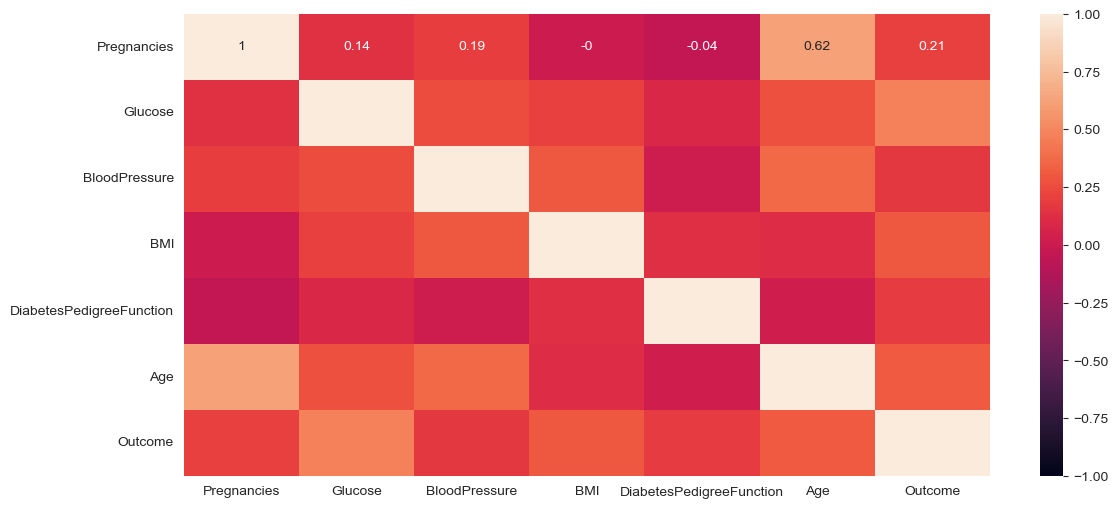

In [77]:
plt.figure(figsize=(13,6)) # plot size
sns.heatmap(pdf.corr(method = 'spearman').round(2), annot=True, vmin=-1, vmax=1)
plt.show() # displaying the plots

- here independent variables are following assumption of logistic approach as there is no high correlation bestween them

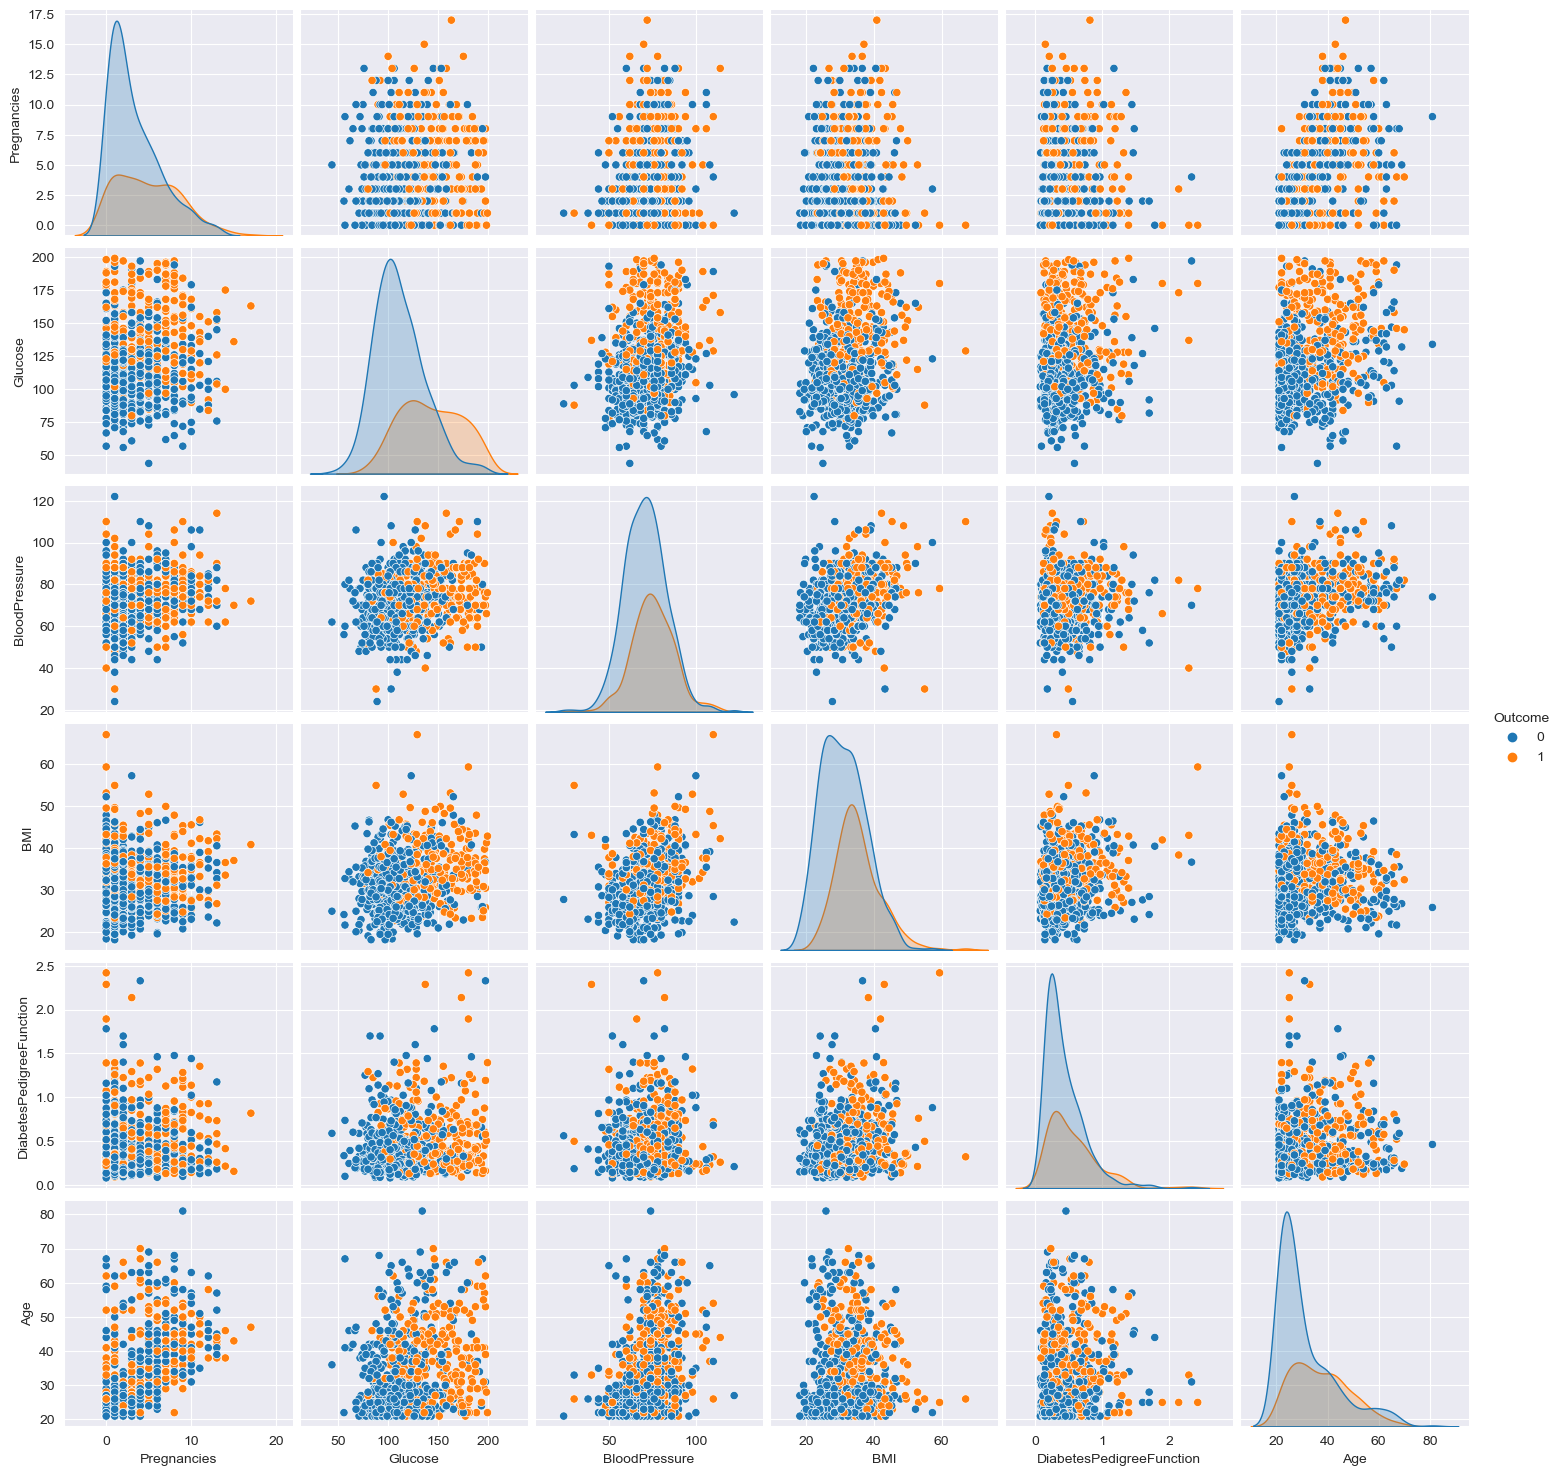

In [78]:
sns.pairplot(data=pdf, hue='Outcome') # hue bring colors to species
plt.show() # displaying the plots

## **Models with their results**

In [79]:
X = pdf.drop(['Outcome'],axis=1,inplace=False) # selecting all variables except outcome
y = pdf['Outcome'] # selecting outcome variable

In [80]:
from sklearn.preprocessing import StandardScaler # importing Standatd Scaler 
sc = StandardScaler() # creating Standatd Scaler object
x = sc.fit_transform(X) # transorming features and standardizing them

In [81]:
from sklearn.model_selection import train_test_split # importing spliting module
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # spliting train and test

In [82]:
# importing evaluation matrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### 1. **Logistic Regression Model**

In [83]:
from sklearn.linear_model import LogisticRegression # importing logistic regression 
reg = LogisticRegression() # creating logistic regression object
reg.fit(x_train,y_train) # fiiting training module

LogisticRegression()

In [84]:
y_pred=reg.predict(x_test) # predicting in test split
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84        97
           1       0.68      0.71      0.69        48

    accuracy                           0.79       145
   macro avg       0.77      0.77      0.77       145
weighted avg       0.80      0.79      0.79       145

Confusion Matrix:
 [[81 16]
 [14 34]]
Training Score:
 77.54749568221071
Mean Squared Error:
 0.20689655172413793
R2 score is:
 0.06572164948453618


In [85]:
reg_score = round(accuracy_score(y_test,y_pred)*100,2) # getting score
print(reg_score) # printing score

79.31


### 2. **Decision Tree Model**

In [86]:
from sklearn.tree import DecisionTreeClassifier # importing decision tree
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')  # creating decision tree object
dtree.fit(x_train,y_train) # fiiting training module

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [87]:
y_pred = dtree.predict(x_test) # predicting in test split
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        97
           1       0.67      0.60      0.64        48

    accuracy                           0.77       145
   macro avg       0.74      0.73      0.74       145
weighted avg       0.77      0.77      0.77       145

Confusion Matrix:
 [[83 14]
 [19 29]]
Training Score:
 82.72884283246978
Mean Squared Error:
 0.22758620689655173
R2 score is:
 -0.02770618556701021


In [88]:
dt_score = round(accuracy_score(y_test,y_pred)*100,2) # getting score
print(dt_score) # printing score

77.24


### 3. **Random Forest Model**

In [89]:
from sklearn.ensemble import RandomForestClassifier # importing random forest
rfc=RandomForestClassifier()  # creating random forest object
rfc.fit(x_train,y_train) # fiiting training module

RandomForestClassifier()

In [90]:
y_pred=rfc.predict(x_test) # predicting in test split
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82        97
           1       0.63      0.69      0.66        48

    accuracy                           0.77       145
   macro avg       0.74      0.75      0.74       145
weighted avg       0.77      0.77      0.77       145

Confusion Matrix:
 [[78 19]
 [15 33]]
Training Score:
 100.0
Mean Squared Error:
 0.23448275862068965
R2 score is:
 -0.0588487972508589


In [91]:
rf_score = round(accuracy_score(y_test,y_pred)*100,2) # getting score
print(rf_score) # printing score

76.55


### 4. **K Neighbors Classifier**

In [92]:
from sklearn.neighbors import KNeighborsClassifier # importing k neighbor
knn=KNeighborsClassifier(n_neighbors=10)  # creating k neighbour object
knn.fit(x_train,y_train) # fiiting training module

KNeighborsClassifier(n_neighbors=10)

In [93]:
y_pred=knn.predict(x_test) # predicting in test split
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        97
           1       0.68      0.62      0.65        48

    accuracy                           0.78       145
   macro avg       0.75      0.74      0.75       145
weighted avg       0.78      0.78      0.78       145

Confusion Matrix:
 [[83 14]
 [18 30]]
Training Score:
 80.65630397236615
Mean Squared Error:
 0.2206896551724138
R2 score is:
 0.003436426116838587


In [94]:
knn_score = round(accuracy_score(y_test,y_pred)*100,2) # getting score
print(knn_score) # printing score

77.93


In [95]:
print('------- Accuracy Table -------')
print()
print('Logistic Regression : ', reg_score)
print()
print('DecisionTree        : ', dt_score)
print()
print('Random Forest       : ', rf_score)
print()
print('K Neighbors         : ', knn_score)
print()
print('------- --------------- ------')

------- Accuracy Table -------

Logistic Regression :  79.31

DecisionTree        :  77.24

Random Forest       :  76.55

K Neighbors         :  77.93

------- --------------- ------


- our Logistic model hs highest percentage od accuracy of almost 79.31 % .
- next is by random forest nearly same as 78.62 % .
- followed by decision tree and kneighbors both are almost same as 77.24 % and 77.93 % .

## **END**